## 1)Problem Statement
This project understands that how student performance is effect by other varaibles like gender,Ethnicity,
Parantel level of education,test performace etc

## 2) Data Collection
kaggle: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

## 3)Importing packages


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## 4)Import csv file 

In [2]:
dataset = pd.read_csv('./data/StudentsPerformance.csv')
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Dataset information

## Check misssing values

In [3]:
# check missing values 
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values

## Check duplicate

In [4]:
dataset.duplicated().sum()

0

There is no duplicate value

## Check datatypes

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Checking unique values in each column 

In [6]:
dataset.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Statistics

In [7]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From this information we can see that the means of all columns is very close to each others

In [18]:
# find the numeric and categorical features
numeric_feature = [fet for fet in dataset.columns if dataset[fet].dtype != "O"]
numeric_feature

['math score', 'reading score', 'writing score']

In [19]:
# categorical features
cat_features = [fet for fet in dataset.columns if dataset[fet].dtype == "O"]
cat_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [20]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Total score and Average score
So here is the three column with numeric value [math score,reading score,writing score].So we can 
combine this all to the single value as a total score.

In [21]:
# so here is three column 
dataset['total_score'] = dataset['math score'] + dataset['reading score'] + dataset['writing score']
dataset['average'] = dataset['total_score']/3

In [24]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [35]:
dataset[dataset['math score'] == 100]['average'].count()

7

In [37]:
mathscore_100s = dataset['math score'].value_counts()[100]
print(f"{mathscore_100s} student score 100")

7 student score 100


## createing the histogram and KDE

<Axes: xlabel='average', ylabel='Count'>

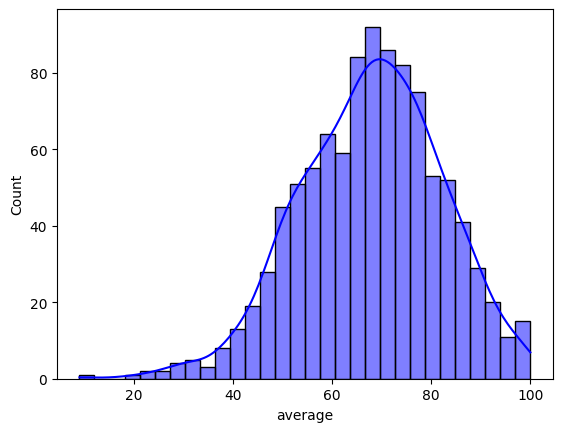

In [48]:
sns.histplot(data=dataset,x=dataset['average'],bins=30,color='b',kde=True)

<Axes: xlabel='average', ylabel='Count'>

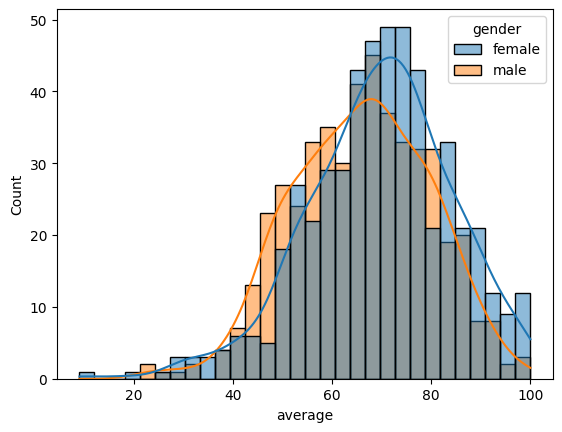

In [49]:
sns.histplot(data=dataset,x=dataset['average'],bins=30,color='b',kde=True,hue="gender")

## Insight
Here we can see that average of female student is better then male student